<a href="https://colab.research.google.com/github/gregh13/Supervised-vs-Unsupervised-Learning-ML-TensorFlow/blob/main/Supervised_vs_Unsupervised_Leaning_in_API_Security_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import scipy.stats as stats


In [350]:
df_raw = pd.read_csv("supervised_dataset.csv")

In [351]:
df_raw.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [352]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1699 non-null   int64  
 1   _id                             1699 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1699 non-null   float64
 5   vsession_duration(min)          1699 non-null   int64  
 6   ip_type                         1699 non-null   object 
 7   num_sessions                    1699 non-null   float64
 8   num_users                       1699 non-null   float64
 9   num_unique_apis                 1699 non-null   float64
 10  source                          1699 non-null   object 
 11  classification                  1699 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [353]:
df_raw.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [354]:
df_raw.duplicated().values.any()

False

In [355]:
df_raw.isna().values.any()

True

In [356]:
nan_rows = df_raw[df_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier


In [357]:
df_clean = df_raw.drop(nan_rows.index)
df_clean.shape

(1695, 12)

In [358]:
df = df_clean.drop(['Unnamed: 0', '_id', "source"], axis=1)

In [359]:
quant_class = [(0 if row == "normal" else 1) for row in df["classification"]]
y = np.array(quant_class)
y[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [360]:
np.count_nonzero(y == 1)

589

In [361]:
np.count_nonzero(y == 0)

1106

In [362]:
quant_ip_type = [(0 if row == "default" else 1) for row in df["ip_type"]]
df["quant_ip_type"] = quant_ip_type
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,classification,quant_ip_type
1593,0.000781,0.218750,32.000000,2,datacenter,12.0,1.0,7.0,outlier,1
1085,0.001331,0.013948,11.451389,132,default,145.0,144.0,23.0,normal,0
287,0.009936,0.007045,36.271630,10747,default,565.0,497.0,127.0,normal,0
740,0.010136,0.007173,33.968220,9751,default,505.0,472.0,115.0,normal,0
1042,0.000621,0.006504,10.250000,69,default,183.0,180.0,12.0,normal,0
612,0.000004,0.016765,10.839925,3,default,4134.0,1062.0,193.0,normal,0
787,0.000727,0.008326,45.891509,425,default,440.0,212.0,81.0,normal,0
1452,0.005333,0.123656,186.000000,60,default,29.0,1.0,23.0,outlier,0
628,0.015628,0.012752,25.994475,4412,default,198.0,181.0,60.0,normal,0
888,0.001389,0.012395,11.584615,189,default,196.0,195.0,28.0,normal,0


In [363]:
df = df.drop(["classification", "ip_type"], axis=1)
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
790,0.026032,0.013767,16.656051,4085,159.0,157.0,36.0,0
839,0.001054,0.014041,16.685714,185,184.0,175.0,41.0,0
307,0.000788,0.002399,31.284099,6151,5205.0,4157.0,312.0,0
397,0.000011,0.014136,14.057692,3,2192.0,312.0,62.0,0
319,0.015501,0.010262,39.958159,8883,338.0,239.0,98.0,0
1451,0.006250,1.000000,2.000000,1,2.0,1.0,2.0,0
886,0.000933,0.009180,11.766551,189,293.0,287.0,31.0,0
1540,0.779381,0.476190,21.000000,983,3.0,1.0,10.0,0
1303,0.001797,0.029703,1212.000000,131,46.0,1.0,36.0,0
1173,0.002000,0.666667,6.000000,1,5.0,1.0,4.0,0


In [ ]:
X_raw = df.to_numpy()
X_raw[1]

array([6.32464613e-05, 2.21146594e-03, 1.61668048e+01, 5.19000000e+02,
       9.29900000e+03, 8.44700000e+03, 3.02000000e+02, 0.00000000e+00])

Now ready to start!

In [ ]:
# Easy Way: 
X_easy = stats.zscore(X_raw, axis=0)
print(f"Easy: {X_easy[1,:]}")

# Manual Way:
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X = (X_raw - X_mean) / X_std
print(f"Manual: {X[1,:]}")

# Just for some coding fun
# 'Reinventing the Wheel'/'Sloth Slow' Way:
columns = X_raw.shape[1]
rows = X_raw.shape[0]
X_slow = np.zeros([rows,columns])
mean = np.zeros(columns)
std = np.zeros(columns)
for col in range(columns):
  for i in range(rows):
    mean[col] += X_raw[i,col]
for col in range(columns):
  mean[col] = mean[col] / rows
for col in range(columns):
  for i in range(rows):
    std[col] += ((X_raw[i,col] - mean[col])**2) / rows
std = np.sqrt(std)
for col in range(columns):
  for i in range(rows):
    X_slow[i,col] = (X_raw[i,col] - mean[col]) / std[col]

print(f"Stone Age: {X_slow[1,:]}")


  



Easy: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Manual: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Stone Age: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (1017, 8) y_train.shape (1017,)
X_test.shape (678, 8) y_test.shape (678,)


In [ ]:
model = Sequential(
    [
      #Dense(units=16, activation="relu"),
      #Dense(units=8, activation="relu"),
      Dense(units=1, activation="sigmoid", name="L3")
    ], name="NN"
)
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(0.01)
)

In [ ]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8238
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5651
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4147
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3214
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2602
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1892
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1484
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1217
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1115
Epoch 13/100
32/32 [=================

In [ ]:
model.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L3 (Dense)                  (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def calc_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    correct = 0
    for i in range(m):
        print(f"Before: {yhat[i]}, {y[i]}")
        if yhat[i] < 0.5:
          yhat[i] = 0
        else:
          yhat[i] = 1
        print(f"After: {yhat[i]}, {y[i]}")  
        if yhat[i] != y[i]:
            incorrect += 1
        else:
            correct += 1
    print(f"\n\n\nNumber of incorrect predictions: {incorrect}")
    print(f"Correct predictions: {correct} out of {m}\n")
    cerr = incorrect / m
    return(cerr)

In [ ]:
training_classification_error = calc_cat_err(y_train, model.predict(X_train))
test_classification_error = calc_cat_err(y_test, model.predict(X_test))
print(f"categorization error, training, NN model: {training_classification_error:0.5f}")
print(f"categorization error, test,     NN model: {test_classification_error:0.5f}")

Before: [3.2733433e-06], 0
After: [0.], 0
Before: [0.01021513], 0
After: [0.], 0
Before: [0.00817192], 0
After: [0.], 0
Before: [1.093051e-06], 0
After: [0.], 0
Before: [9.189357e-08], 0
After: [0.], 0
Before: [0.00020754], 0
After: [0.], 0
Before: [0.00214654], 0
After: [0.], 0
Before: [0.00156322], 0
After: [0.], 0
Before: [0.03281558], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [0.01059777], 0
After: [0.], 0
Before: [0.00850391], 0
After: [0.], 0
Before: [0.02965552], 0
After: [0.], 0
Before: [0.00092855], 0
After: [0.], 0
Before: [0.99999964], 1
After: [1.], 1
Before: [0.9997917], 1
After: [1.], 1
Before: [0.00770545], 0
After: [0.], 0
Before: [4.472709e-06], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [0.9994296], 1
After: [1.], 1
Before: [0.00966224], 0
After: [0.], 0
Before: [0.999874], 1
After: [1.], 1
Before: [0.9999944], 1
After: [1.], 1
Before: [0.00017494], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [2.829

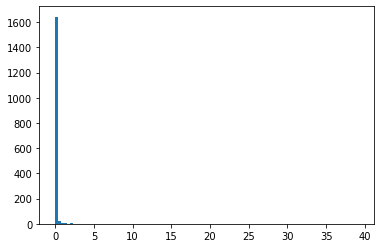

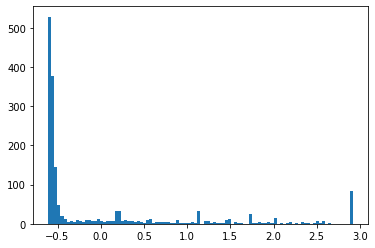

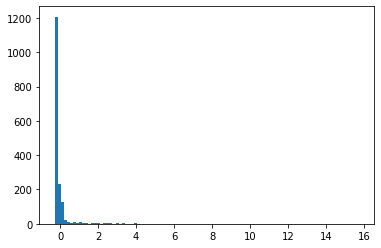

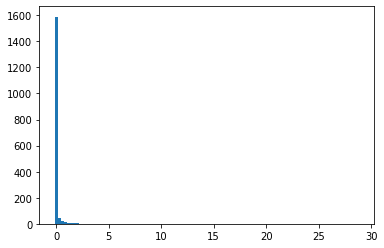

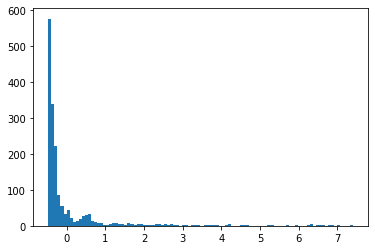

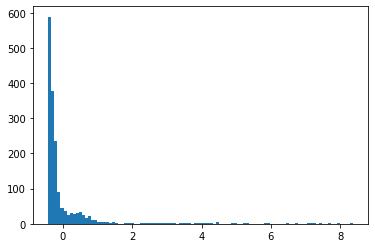

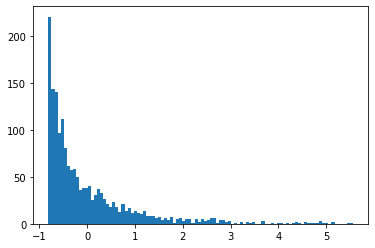

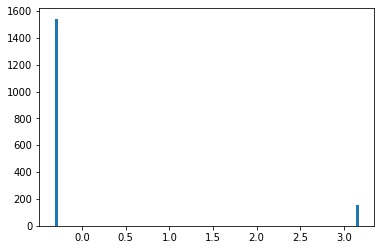

In [ ]:
for i in range(X.shape[1]):
  plt.hist(X[:,i], bins=100)
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


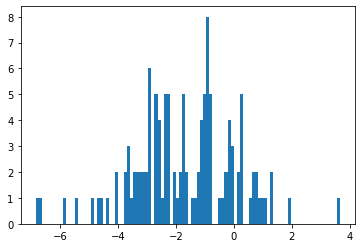

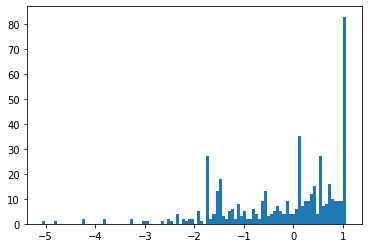

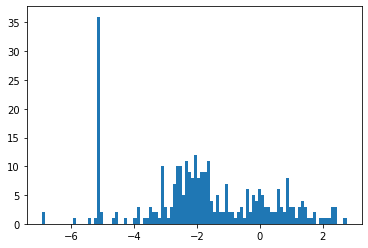

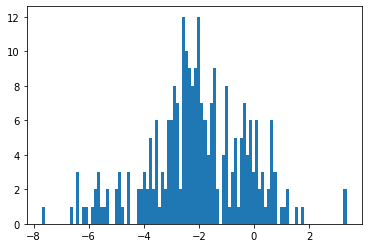

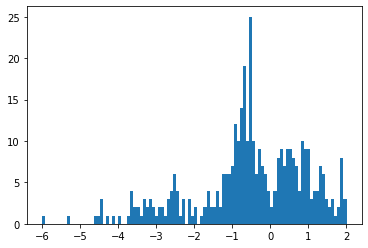

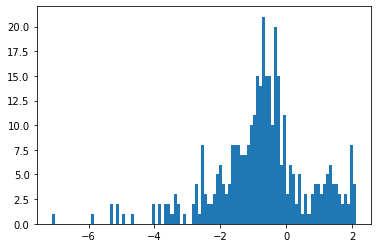

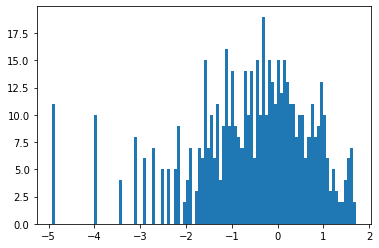

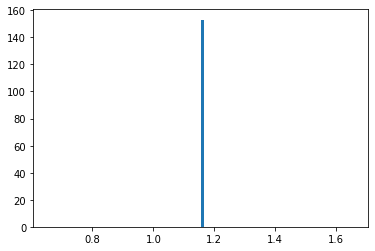

In [ ]:
for i in range(X.shape[1]):
  plt.hist(np.log(X[:,i]), bins=100)
  plt.show()

Now Try k-means unsupervised learning